# Introduction to Data Science 2025

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="font-weight: bold"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in the course material.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) [train.csv] from Kaggle or <span style="font-weight: 500">directly from the course material</span>, and complete the following exercises. If you choose to download the dataset from Kaggle, you will need to create a Kaggle account unless you already have one, but it is quite straightforward.

The dataset consists of personal information of all the passengers on board the RMS Titanic, along with information about whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data.

    <span style="font-weight: 500"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="font-weight: 500"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [1202]:
import pandas as pd
import matplotlib.pyplot as plt

In [1203]:
titanic_df = pd.read_csv('../data/Titanic_dataset.csv')

2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="font-weight: 500"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="font-weight: 500"> *Hint: The shape of the data should now be (891, 9).*</span>

In [1204]:
titanic_df.shape

(891, 12)

In [1205]:
titanic_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [1206]:
titanic_df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)


3. The column <span style="font-weight: 500">*Cabin*</span> contains a letter and a number. A smart catch at this point would be to notice that the letter stands for the deck level on the ship. Keeping just the deck information would be more informative when developing, e.g. a classifier that predicts whether a passenger survived. The next step in our preprocessing will be to add a new column to the dataset, which consists simply of the deck letter. You can then remove the original <span style="font-weight: 500">*Cabin*</span>-column.

<span style="font-weight: 500">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [1207]:
titanic_df['Cabin'].isna().sum()

np.int64(687)

In [1208]:
import re
def cabin_letter(cabin):
    weird_string = cabin
    split_cabin = cabin.split()
    cabin = split_cabin[0]
    if 'A' in cabin:
        return 'A'
    elif 'B' in cabin:
        return 'B'
    elif 'C' in cabin:
        return 'C'  
    elif 'D' in cabin:
        return 'D'
    elif 'E' in cabin:
        return 'E'
    elif 'F' in cabin:
        return 'F'
    elif 'G' in cabin:
        return 'G'
    elif 'T' in cabin:
        return 'T'
    else:
        return weird_string
titanic_df['Deck_level'] = titanic_df['Cabin'][titanic_df['Cabin'].notna()].apply(cabin_letter) 
titanic_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck_level
0,0,3,male,22.0,1,0,7.2500,NaN,S,NaN
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,NaN
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,NaN,S,NaN
5,0,3,male,NaN,0,0,8.4583,NaN,Q,NaN
6,0,1,male,54.0,0,0,51.8625,E46,S,E
7,0,3,male,2.0,3,1,21.0750,NaN,S,NaN
8,1,3,female,27.0,0,2,11.1333,NaN,S,NaN
9,1,2,female,14.0,1,0,30.0708,NaN,C,NaN


In [1209]:
titanic_df.isna().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Cabin         687
Embarked        2
Deck_level    687
dtype: int64

In [1210]:
titanic_df.drop(columns=['Cabin'], inplace=True)
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck_level
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [1211]:
titanic_df.groupby('Deck_level').count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Deck_level,,,,,,,,
A,15,15,15,12,15,15,15,15
B,47,47,47,45,47,47,47,45
C,59,59,59,51,59,59,59,59
D,33,33,33,31,33,33,33,33
E,32,32,32,30,32,32,32,32
F,13,13,13,11,13,13,13,13
G,4,4,4,4,4,4,4,4
T,1,1,1,1,1,1,1,1


In [1212]:
titanic_df['Deck_level'].mode()

0    C
Name: Deck_level, dtype: object

In [1213]:
titanic_df['Deck_level'] = titanic_df['Deck_level'].fillna(titanic_df['Deck_level'].mode()[0])
titanic_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck_level
0,0,3,male,22.0,1,0,7.2500,S,C
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,C
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,C
5,0,3,male,NaN,0,0,8.4583,Q,C
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,C
8,1,3,female,27.0,0,2,11.1333,S,C
9,1,2,female,14.0,1,0,30.0708,C,C


4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). To preprocess the categorical variables so that they're ready for further computation, we need to avoid the current string format of the values. This means the next step for each categorical variable is to transform the string values to numeric ones, that correspond to a unique integer ID representative of each distinct category. This process is called label encoding and you can read more about it [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

    <span style="font-weight: 500">*Hint: Pandas can do this for you.*</span>

In [1214]:
titanic_df['Deck_level_encode'] = titanic_df['Deck_level'].astype('category').cat.codes
titanic_df['Sex_encode'] = titanic_df['Sex'].astype('category').cat.codes
titanic_df['Embarked_encode'] = titanic_df['Embarked'].astype('category').cat.codes

print("Category Mapping (Deck):", dict(enumerate(titanic_df['Deck_level'].astype('category').cat.categories)))


print("Category Mapping (Sex):", dict(enumerate(titanic_df['Sex'].astype('category').cat.categories)))

print("Category Mapping (Embarked):", dict(enumerate(titanic_df['Embarked'].astype('category').cat.categories)))



Category Mapping (Deck): {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'T'}
Category Mapping (Sex): {0: 'female', 1: 'male'}
Category Mapping (Embarked): {0: 'C', 1: 'Q', 2: 'S'}


In [1215]:
titanic_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck_level,Deck_level_encode,Sex_encode,Embarked_encode
0,0,3,male,22.0,1,0,7.2500,S,C,2,1,2
1,1,1,female,38.0,1,0,71.2833,C,C,2,0,0
2,1,3,female,26.0,0,0,7.9250,S,C,2,0,2
3,1,1,female,35.0,1,0,53.1000,S,C,2,0,2
4,0,3,male,35.0,0,0,8.0500,S,C,2,1,2
5,0,3,male,NaN,0,0,8.4583,Q,C,2,1,1
6,0,1,male,54.0,0,0,51.8625,S,E,4,1,2
7,0,3,male,2.0,3,1,21.0750,S,C,2,1,2
8,1,3,female,27.0,0,2,11.1333,S,C,2,0,2
9,1,2,female,14.0,1,0,30.0708,C,C,2,0,0


In [1216]:
titanic_df.drop(columns=['Deck_level', 'Sex', 'Embarked'], inplace=True)

5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during preprocessing:

    a) For continuous variables, replace the missing values with the mean of the non-missing values of that column.

    b) For categorical variables, replace the missing values with the mode of the column.

    <span style="font-weight: 500">*Remember: Even though in the previous step we transformed categorical variables into their numeric representation, they are still categorical.*</span>

In [1217]:
titanic_df.isna().sum()
# The missing value for the Embarked_encode is tied to -1, when we encode the categorical feature the unknown (NaN) was converted to -1

# Continues variables
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df.groupby('Deck_level_encode').count()

/var/folders/q0/bm9058_95z16l6j28pkf1z580000gn/T/ipykernel_64883/336151682.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encode,Embarked_encode
Deck_level_encode,,,,,,,,
0,15,15,15,15,15,15,15,15
1,47,47,47,47,47,47,47,47
2,746,746,746,746,746,746,746,746
3,33,33,33,33,33,33,33,33
4,32,32,32,32,32,32,32,32
5,13,13,13,13,13,13,13,13
6,4,4,4,4,4,4,4,4
7,1,1,1,1,1,1,1,1


In [1218]:
titanic_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck_level_encode,Sex_encode,Embarked_encode
0,0,3,22.000000,1,0,7.2500,2,1,2
1,1,1,38.000000,1,0,71.2833,2,0,0
2,1,3,26.000000,0,0,7.9250,2,0,2
3,1,1,35.000000,1,0,53.1000,2,0,2
4,0,3,35.000000,0,0,8.0500,2,1,2
5,0,3,29.699118,0,0,8.4583,2,1,1
6,0,1,54.000000,0,0,51.8625,4,1,2
7,0,3,2.000000,3,1,21.0750,2,1,2
8,1,3,27.000000,0,2,11.1333,2,0,2
9,1,2,14.000000,1,0,30.0708,2,0,0


6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="font-weight: 500"> .csv</span> file. Then, write another file, this time in <span style="font-weight: 500">JSON</span> format, with the following structure:

In [1219]:
titanic_df.to_csv('../data/Titanic_processed.csv')
titanic_df.to_json(('../data/Titanic_processed.json'))

Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have done some preprocessing, it’s time to look at the data with some exploratory data analysis.

1. First investigate each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [1220]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck_level_encode,Sex_encode,Embarked_encode
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,2.089787,0.647587,1.529742
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.724233,0.477990,0.800254
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.000000,0.000000,1.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,2.000000,1.000000,2.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,7.000000,1.000000,2.000000


2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”.

    <span style="font-weight: 500">*Hint 1: What are the average/most frequent variable values for a non-survivor?*</span>
    
    <span style="font-weight: 500">*Hint 2: You can split the dataframe in two: one subset containing all the survivors and one consisting of all the non-survivor instances. Then, you can use the summary statistics of each of these dataframe to create a prototype "average survivor" and "average non-survivor", respectively.*</span>

In [1221]:
titanic_df[titanic_df['Survived'] == 0].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck_level_encode,Sex_encode,Embarked_encode
count,549.0,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,0.0,2.531876,30.415100,0.553734,0.329690,22.117887,2.043716,0.852459,1.641166
std,0.0,0.735805,12.457370,1.288399,0.823166,31.388207,0.580949,0.354968,0.710081
min,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,23.000000,0.000000,0.000000,7.854200,2.000000,1.000000,2.000000
50%,0.0,3.000000,29.699118,0.000000,0.000000,10.500000,2.000000,1.000000,2.000000
75%,0.0,3.000000,35.000000,1.000000,0.000000,26.000000,2.000000,1.000000,2.000000
max,0.0,3.000000,74.000000,8.000000,6.000000,263.000000,7.000000,1.000000,2.000000


In [1222]:
titanic_df[titanic_df['Survived'] == 1].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck_level_encode,Sex_encode,Embarked_encode
count,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.549778,0.473684,0.464912,48.395408,2.163743,0.318713,1.350877
std,0.0,0.863321,13.772498,0.708688,0.771712,66.596998,0.904259,0.466660,0.899486
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,1.0,1.000000,21.000000,0.000000,0.000000,12.475000,2.000000,0.000000,0.000000
50%,1.0,2.000000,29.699118,0.000000,0.000000,26.000000,2.000000,0.000000,2.000000
75%,1.0,3.000000,35.000000,1.000000,1.000000,57.000000,2.000000,1.000000,2.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200,6.000000,1.000000,2.000000


In [1223]:
titanic_survivors = titanic_df[titanic_df['Survived'] == 1]
titanic_no_survivors = titanic_df[titanic_df['Survived'] == 0]

3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group?

    <span style="font-weight: 500">*Note: Feel free to choose EDA methods according to your preference: non-graphical/graphical, static/interactive - anything goes.*</span>

Age                   Axes(0.125,0.11;0.0945122x0.77)
Embarked_encode    Axes(0.238415,0.11;0.0945122x0.77)
Fare               Axes(0.351829,0.11;0.0945122x0.77)
Parch              Axes(0.465244,0.11;0.0945122x0.77)
Pclass             Axes(0.578659,0.11;0.0945122x0.77)
Sex_encode         Axes(0.692073,0.11;0.0945122x0.77)
SibSp              Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

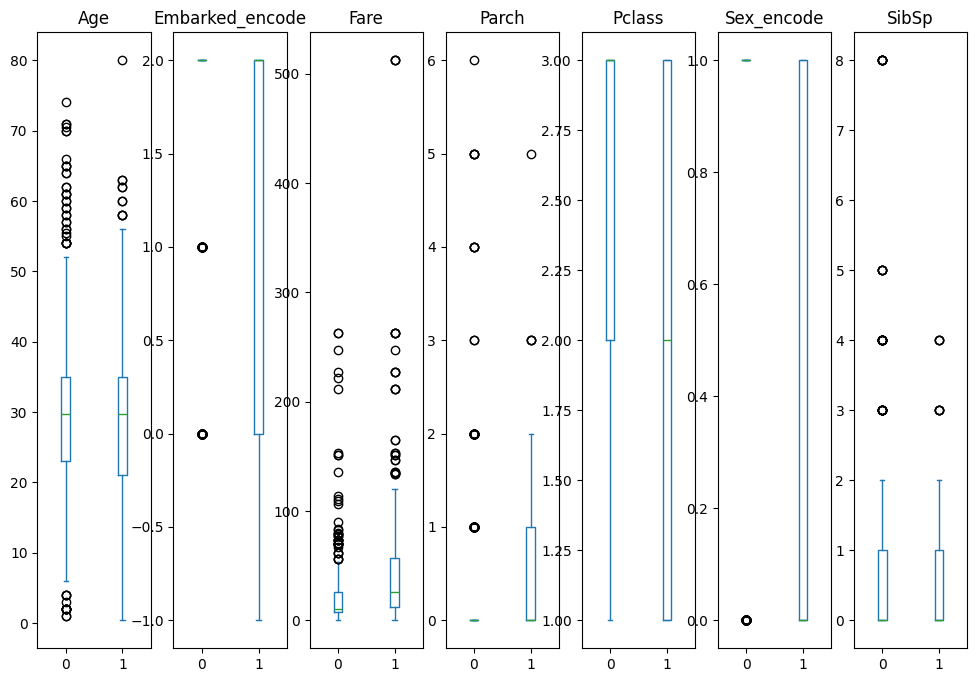

In [1224]:
titanic_df.drop(columns=['Deck_level_encode']).plot.box(by = 'Survived', figsize = (12,8))

In [1225]:
# 0 = female, 1 = male
titanic_by_sex_survive = titanic_df.groupby(['Survived', 'Sex_encode']).size()
titanic_by_sex_survive

Survived  Sex_encode
0         0              81
          1             468
1         0             233
          1             109
dtype: int64

4. Next, let's continue the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to encode the survival status.

    <span style="font-weight: 500">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="font-weight: 500">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

In [1226]:
titanic_by_sex_survive.keys()
array = ['female_no_survivor', 'female_survivor', 'male_no_survivor', 'male_survivor' ]

In [1227]:
val = titanic_by_sex_survive.values
val

array([ 81, 468, 233, 109])

Text(0.5, 0.98, 'Categorical Plotting')

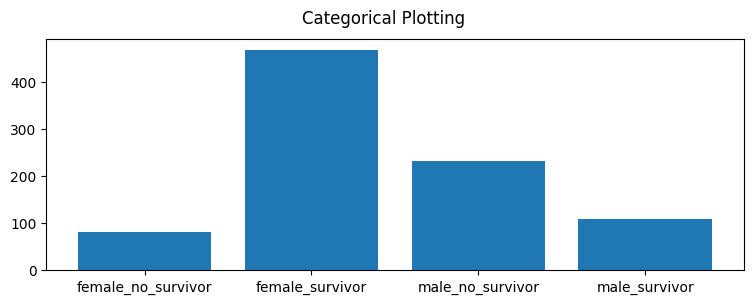

In [1228]:
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.bar(array, val)
fig.suptitle('Categorical Plotting')

5. Finally, recall the preprocessing we did in the first exercise. What can you say about the effect of the choices that were made to use the mode and mean to impute missing values, instead of, for example, ignoring passengers with missing data?

Mean/mode imputations don't eliminate rows but biases distribution. We had to check what type of missingness we were dealing first. At first, age seems MAR (Missing at Random) but Cabin is MNAR (Missing not at random), because the quantity of NaN are far supperior to the rest of the categories. So mean/mode was acceptable for Age, but for Cabin it likely injected bias. One better approach would be to keep the missing values as 'Unknown".

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise from last week. Find the saved <span style="font-weight: 500">pos.txt</span> and <span style="font-weight: 500">neg.txt</span> files, or, alternatively, you can find the week 1 example solutions on the MOOC platform after Tuesday.

1. Find the most common words in each file (positive and negative). Examine the results. Do they tend to be general terms relating to the nature of the data? How well do they indicate positive/negative sentiment?

In [1229]:
neg = pd.read_csv('../data/neg.csv')
pos = pd.read_csv('../data/pos.csv')

/var/folders/q0/bm9058_95z16l6j28pkf1z580000gn/T/ipykernel_64883/10248426.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  pos = pd.read_csv('../data/pos.csv')


In [1230]:
neg.head(3)

,Unnamed: 0,verified,reviewTime,reviewerID,asin,style,reviewerName,summary,unixReviewTime,vote,image,clean_text
0,1,True,"04 19, 2018",ABCA1A8E4DGV1,0209688726,{'Color:': ' Blue'},noe,sucks,1524096000,NaN,NaN,suck bare pick anyth definit car pretti much a...
1,2,True,"04 16, 2018",A1NX8HM89FRQ32,0209688726,{'Color:': ' Black'},Eduard,Defective,1523836800,NaN,NaN,"well write short one, blew 2 fuse car. appar o..."
2,7,True,"03 1, 2018",A1SPIM9Y6HUUSH,0209688726,{'Color:': ' Black'},Frank W.Brodeur,Two Stars,1519862400,NaN,NaN,2017 outback everytim tri use blow fuse .


In [1231]:
pos.head(3)

,Unnamed: 0,verified,reviewTime,reviewerID,asin,style,reviewerName,summary,unixReviewTime,vote,image,clean_text
0,0,False,"05 1, 2015",A8WEXFRWX1ZHH,0209688726,{'Color:': ' AC'},Goldengate,Works well if you place phone in horizontally ...,1430438400,NaN,NaN,"wrote review, manufactur contact explain use t..."
1,4,True,"04 8, 2018",A3GK37JO2MGW6Q,0209688726,{'Color:': ' Black'},danny,Five Stars,1523145600,NaN,NaN,ok job
2,5,True,"03 24, 2018",AIY18YON1TWJJ,0209688726,{'Color:': ' Black'},Karen H.,this have been great for my Ford transit connect,1521849600,NaN,NaN,3 big dogs. great ford transit connect.


In [1232]:
neg.fillna({'clean_text': ''}, inplace=True)
pos.fillna({'clean_text':''}, inplace=True)

In [1233]:
def count_words(words:str) -> dict:
    words = words.split()

    key = set(words)

    count = {word:0 for word in key}

    for word in words:
        count[word] +=1
    return count


neg['dic_clean_text'] = neg['clean_text'].apply(count_words)
pos['dic_clean_text'] = pos['clean_text'].apply(count_words)


In [1234]:
neg.head(3)

,Unnamed: 0,verified,reviewTime,reviewerID,asin,style,reviewerName,summary,unixReviewTime,vote,image,clean_text,dic_clean_text
0,1,True,"04 19, 2018",ABCA1A8E4DGV1,0209688726,{'Color:': ' Blue'},noe,sucks,1524096000,NaN,NaN,suck bare pick anyth definit car pretti much a...,"{'anyth': 2, 'pretti': 1, 'definit': 1, 'suck'..."
1,2,True,"04 16, 2018",A1NX8HM89FRQ32,0209688726,{'Color:': ' Black'},Eduard,Defective,1523836800,NaN,NaN,"well write short one, blew 2 fuse car. appar o...","{'blew': 1, 'demand': 1, '2': 1, 'car.': 1, 'o..."
2,7,True,"03 1, 2018",A1SPIM9Y6HUUSH,0209688726,{'Color:': ' Black'},Frank W.Brodeur,Two Stars,1519862400,NaN,NaN,2017 outback everytim tri use blow fuse .,"{'2017': 1, '.': 1, 'tri': 1, 'everytim': 1, '..."


In [1235]:
pos.head(3)

,Unnamed: 0,verified,reviewTime,reviewerID,asin,style,reviewerName,summary,unixReviewTime,vote,image,clean_text,dic_clean_text
0,0,False,"05 1, 2015",A8WEXFRWX1ZHH,0209688726,{'Color:': ' AC'},Goldengate,Works well if you place phone in horizontally ...,1430438400,NaN,NaN,"wrote review, manufactur contact explain use t...","{'side.': 1, 'translat': 1, 'qualiti': 1, 'sta..."
1,4,True,"04 8, 2018",A3GK37JO2MGW6Q,0209688726,{'Color:': ' Black'},danny,Five Stars,1523145600,NaN,NaN,ok job,"{'ok': 1, 'job': 1}"
2,5,True,"03 24, 2018",AIY18YON1TWJJ,0209688726,{'Color:': ' Black'},Karen H.,this have been great for my Ford transit connect,1521849600,NaN,NaN,3 big dogs. great ford transit connect.,"{'transit': 1, 'big': 1, 'dogs.': 1, '3': 1, '..."


In [1236]:
total_neg_text = neg['clean_text'].str.cat(sep=' ')
total_pos_text = pos['clean_text'].str.cat(sep = ' ')
dic_total_neg_text = count_words(total_neg_text)
dic_total_pos_text = count_words(total_pos_text)


In [1237]:
neg_df = pd.Series(dic_total_neg_text)


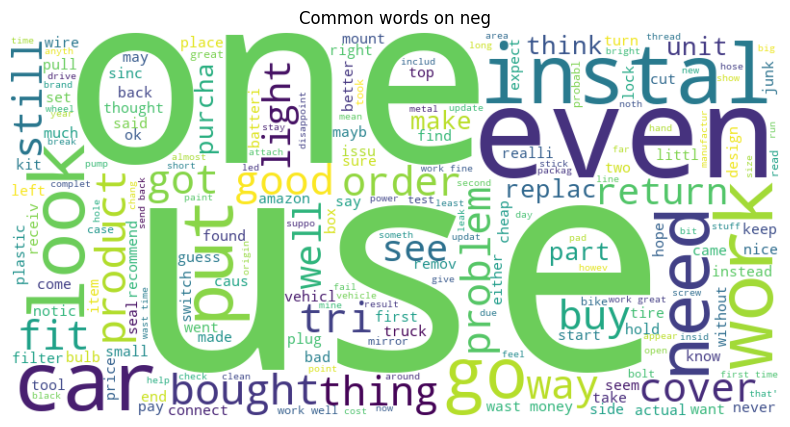

In [1238]:
from wordcloud import WordCloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(total_neg_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')  
plt.title("Common words on neg")
plt.show()


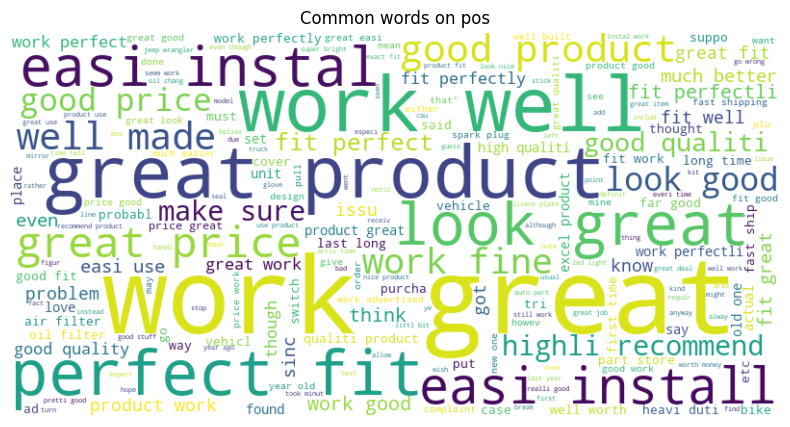

In [1239]:

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(total_pos_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')  
plt.title("Common words on pos")
plt.show()


2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the two text files, and make them into a <span style="font-weight: 500">2 x m</span> matrix, where <span style="font-weight: 500">m</span> is the number of unique words in the data. The problem with using the most common words in a review to analyze its contents is that words that are common overall will be common in all reviews (both positive and negative). This means that they probably are not good indicators about the sentiment of a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (here the reviews are the documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in other reviews as well (inverse document frequency). You can use any variant of the formula, as well as off-the-shelf implementations. <span style="font-weight: 500">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [1240]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
docs = pd.concat([neg['clean_text'], pos['clean_text']], ignore_index=True)
y    = np.r_[np.zeros(len(neg), dtype=int), np.ones(len(pos), dtype=int)]

vec = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5, sublinear_tf=True)
X   = vec.fit_transform(docs)
vocab = np.array(vec.get_feature_names_out())

neg_mean = np.asarray(X[y==0].mean(axis=0)).ravel()
pos_mean = np.asarray(X[y==1].mean(axis=0)).ravel()


neg_top = pd.DataFrame({'term': vocab, 'tfidf': neg_mean}).nlargest(20,'tfidf')
pos_top = pd.DataFrame({'term': vocab, 'tfidf': pos_mean}).nlargest(20,'tfidf')

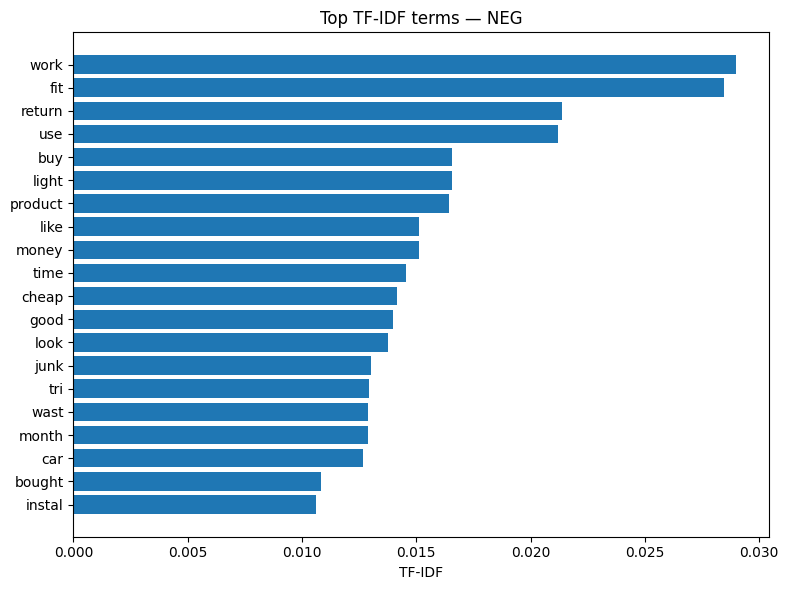

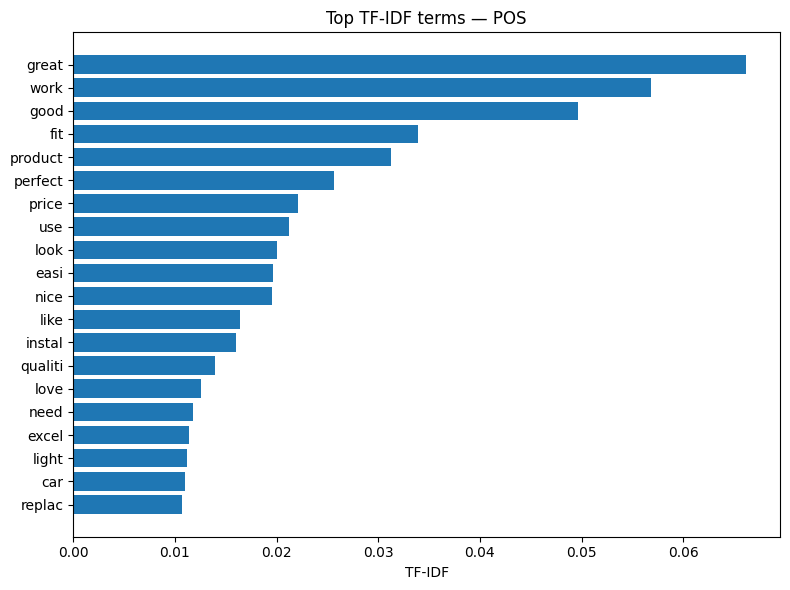

In [1241]:
import matplotlib.pyplot as plt

def plot_top(df, title):
    df = df.sort_values("tfidf")
    plt.figure(figsize=(8,6))
    plt.barh(df["term"], df["tfidf"])
    plt.title(title)
    plt.xlabel("TF-IDF")
    plt.tight_layout()
    plt.show()

plot_top(neg_top, "Top TF-IDF terms — NEG")
plot_top(pos_top, "Top TF-IDF terms — POS")

3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [1242]:
from collections import Counter
neg_freq = Counter(total[0].split())
pos_freq = Counter(total[1].split())
neg_common = pd.DataFrame(neg_freq.most_common(30), columns=["term","count"])
pos_common = pd.DataFrame(pos_freq.most_common(30), columns=["term","count"])

display(neg_common.head(20))
display(pos_common.head(20))


,term,count
0,one,33913
1,use,32065
2,work,30327
3,would,27133
4,fit,25983
5,get,25868
6,like,20118
7,light,18671
8,look,17946
9,product,17086


,term,count
0,work,394341
1,great,334615
2,use,310897
3,good,250771
4,fit,237034
5,one,181698
6,look,171509
7,like,170845
8,instal,166473
9,easi,148893


In [1243]:
# Optional quick overlap check to see how TF-IDF differs from raw freq
overlap = set(neg_top.term[:30]) & set(neg_common.term[:30])
print(f"Overlap NEG (top TF-IDF vs most common): {len(overlap)} terms ->", overlap)

overlap = set(pos_top.term[:30]) & set(pos_common.term[:30])
print(f"Overlap POS (top TF-IDF vs most common): {len(overlap)} terms ->", overlap)

Overlap NEG (top TF-IDF vs most common): 15 terms -> {'light', 'like', 'tri', 'good', 'instal', 'buy', 'work', 'bought', 'product', 'use', 'return', 'time', 'car', 'fit', 'look'}
Overlap POS (top TF-IDF vs most common): 18 terms -> {'light', 'need', 'price', 'like', 'perfect', 'qualiti', 'good', 'instal', 'replac', 'work', 'product', 'use', 'nice', 'easi', 'car', 'fit', 'look', 'great'}


4. Plot the words in each class with their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset.

    <span style="font-weight: 500">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

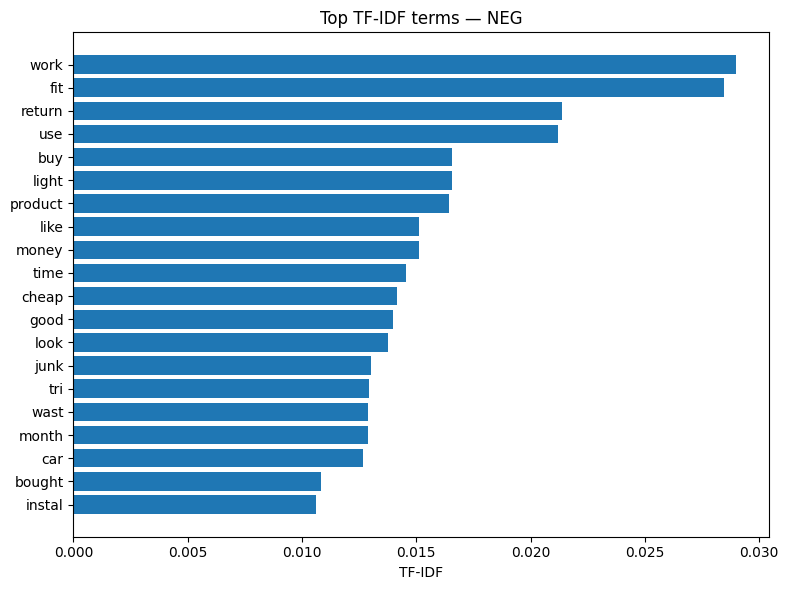

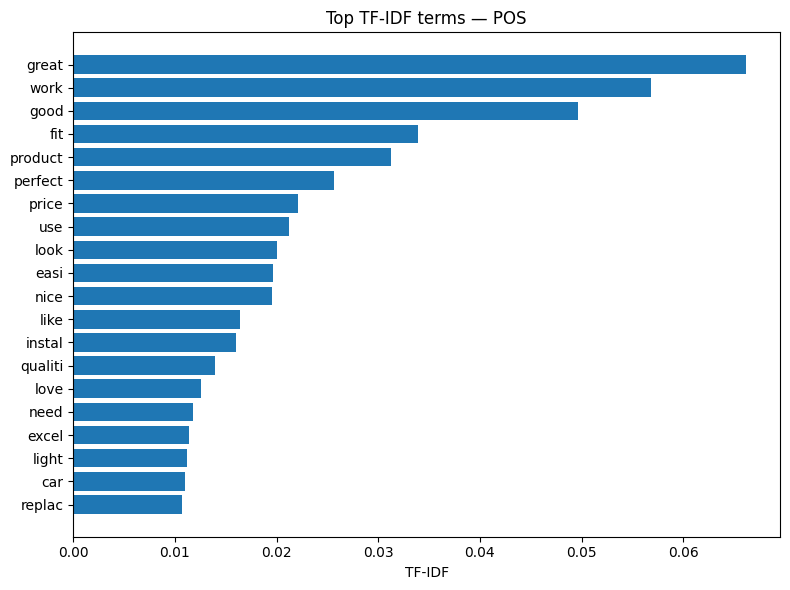

In [1244]:
import matplotlib.pyplot as plt

def plot_top(df, title, k=20):
    df = df.head(k).sort_values("tfidf")  # small → large for a clean barh
    plt.figure(figsize=(8, 6))
    plt.barh(df["term"], df["tfidf"])
    plt.title(title)
    plt.xlabel("TF-IDF")
    plt.tight_layout()
    plt.show()

plot_top(neg_top, "Top TF-IDF terms — NEG", k=20)
plot_top(pos_top, "Top TF-IDF terms — POS", k=20)

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose ways to improve them.

1. Find at least three statistical visualizations you think are not very good and identify their problems. Copying examples from various junk chart websites is not accepted – you should find your own junk charts, out in the wild. You should be able to find good (or rather, bad) examples quite easily since a significant fraction of charts can have at least *some* issues. The examples you choose should also have different problems, e.g., try to avoid collecting three bar charts, all with problematic axes. Instead, try to find as interesting and diverse examples as you can.

The bar chart’s y-axis starts around ~8.6% instead of 0%, massively exaggerating tiny differences between 8.6–8.8–9.0:
https://www.newscaststudio.com/2011/12/13/fox-graphic-shows-inaccurate-unemployment-figure/

Reuters published a dramatic red “blood” graphic about Florida gun deaths before/after the 2005 law; several outlets critiqued how the design and framing could mislead.
https://www.livescience.com/45083-misleading-gun-death-chart.html


Canon’s 2013 annual report uses donut charts for “At a glance” sales composition (2004 vs. 2013). The fine print even notes the pies don’t add to 100% because “Others and Corporate” are excluded.
https://global.canon/en/ir/annual/canon-annual-report-2013.pdf


2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.



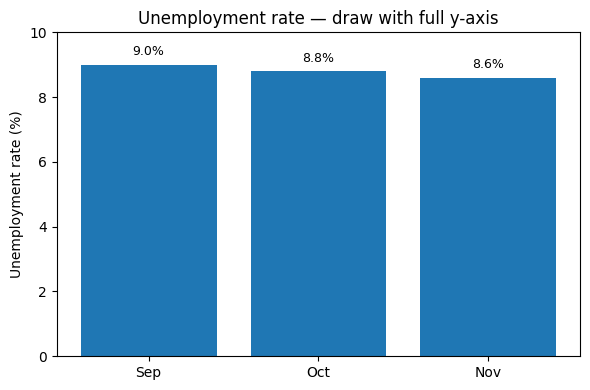

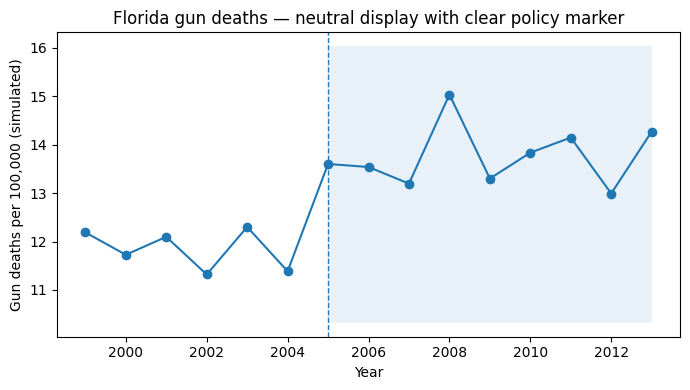

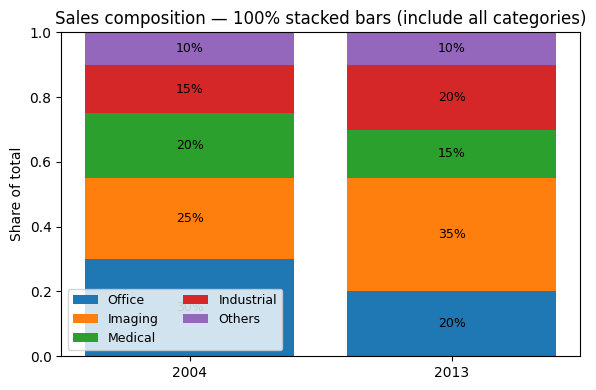

Saved to: /Users/villafuertech/Documents/Academic/University/Septimo_Semestre/Introduction_to_Data_Science/Exploratory_Data_Analysis/notebooks/figs


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Where to save figures
OUTDIR = "figs"
os.makedirs(OUTDIR, exist_ok=True)

# -------------------------------
# 1) Unemployment bars (fix axis)
# -------------------------------
months = ["Sep", "Oct", "Nov"]
unemp_rates = [9.0, 8.8, 8.6]  # approx values from the on-air graphic

plt.figure(figsize=(6, 4))
bars = plt.bar(months, unemp_rates)
plt.ylim(0, 10)  # full baseline to avoid exaggeration
plt.ylabel("Unemployment rate (%)")
plt.title("Unemployment rate — draw with full y-axis")
for b, v in zip(bars, unemp_rates):
    plt.text(b.get_x() + b.get_width()/2, v + 0.2, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.savefig(os.path.join(OUTDIR, "unemployment_fixed.png"), dpi=150, bbox_inches="tight")
plt.show()

# ---------------------------------------------------------
# 2) “Stand-Your-Ground” — neutral per-capita time series
# ---------------------------------------------------------
np.random.seed(12)
years = np.arange(1999, 2014)  # 1999–2013
pre_mask = years < 2005
post_mask = years >= 2005

# Simulated rates per 100k: gentle level pre-2005, modest increase after
rates = np.empty_like(years, dtype=float)
rates[pre_mask] = 12 + np.random.normal(0, 0.4, pre_mask.sum())
rates[post_mask] = 13.6 + np.random.normal(0, 0.5, post_mask.sum())

plt.figure(figsize=(7, 4))
plt.plot(years, rates, marker="o")
plt.axvline(2005, linestyle="--", linewidth=1)  # policy marker
plt.xlabel("Year")
plt.ylabel("Gun deaths per 100,000 (simulated)")
plt.title("Florida gun deaths — neutral display with clear policy marker")

# Light shading post-2005 for context
plt.fill_between(years, rates.min()-1, rates.max()+1, where=post_mask, alpha=0.1, step="pre")
plt.tight_layout()
plt.savefig(os.path.join(OUTDIR, "syg_rates_fixed.png"), dpi=150, bbox_inches="tight")
plt.show()

# ---------------------------------------------------------
# 3) Composition donuts → 100% stacked bars (two years)
# ---------------------------------------------------------
categories = ["Office", "Imaging", "Medical", "Industrial", "Others"]
y2004 = np.array([30, 25, 20, 15, 10], dtype=float)  # % shares (approx)
y2013 = np.array([20, 35, 15, 20, 10], dtype=float)

values = np.vstack([y2004, y2013])
shares = (values.T / values.sum(axis=1)).T  # normalize rows to 1.0

xs = np.arange(2)
labels = ["2004", "2013"]
bottoms = np.zeros(2)

plt.figure(figsize=(6, 4))
for i, cat in enumerate(categories):
    h = shares[:, i]
    plt.bar(xs, h, bottom=bottoms, label=cat)
    bottoms += h

plt.xticks(xs, labels)
plt.ylim(0, 1)
plt.ylabel("Share of total")
plt.title("Sales composition — 100% stacked bars (include all categories)")

# Add % labels centered on segments
for j, x in enumerate(xs):
    cum = 0.0
    for i in range(len(categories)):
        h = shares[j, i]
        plt.text(x, cum + h/2, f"{int(round(h*100, 0))}%", ha="center", va="center", fontsize=9)
        cum += h

plt.legend(ncol=2, fontsize=9)
plt.tight_layout()
plt.savefig(os.path.join(OUTDIR, "composition_100pct_stacked.png"), dpi=150, bbox_inches="tight")
plt.show()



#Improved "junk charts" — produced with ChatGPT (matplotlib, simulated data)

**Submit a PDF with all the charts (the ones you found and the ones you produced).**